In [1]:
import pandas as pd

benin = pd.read_csv("../data/benin_clean(2).csv")
sierra = pd.read_csv("../data/sierraleone_clean(2).csv")
togo = pd.read_csv("../data/togo_clean(2).csv")

benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df = pd.concat([benin, sierra, togo], ignore_index=True)
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin
3,2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin
4,2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin


C:\Users\ruthg\AppData\Local\Temp\ipykernel_19308\2677269602.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  b = plt.boxplot(data, labels=countries, patch_artist=True)


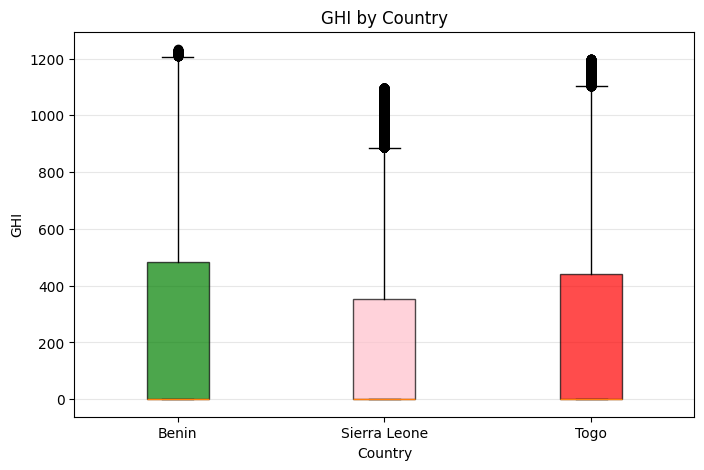

C:\Users\ruthg\AppData\Local\Temp\ipykernel_19308\2677269602.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  b = plt.boxplot(data, labels=countries, patch_artist=True)


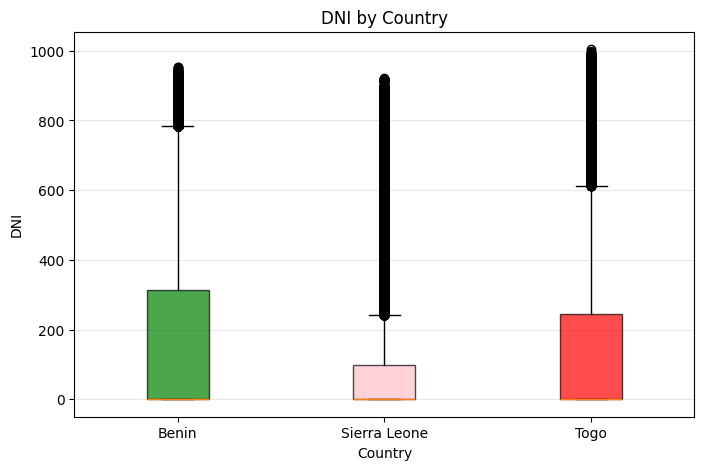

C:\Users\ruthg\AppData\Local\Temp\ipykernel_19308\2677269602.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  b = plt.boxplot(data, labels=countries, patch_artist=True)


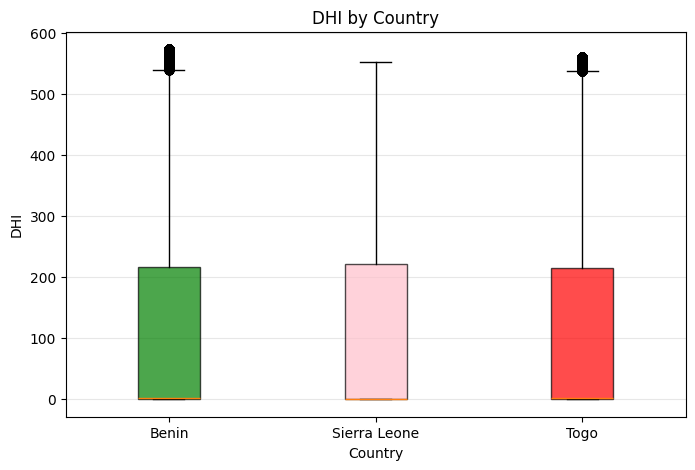

In [10]:
import matplotlib.pyplot as plt

color_map = {
    "Benin": "green",
    "Sierra Leone": "pink",
    "Togo": "red"
}

metrics = ["GHI", "DNI", "DHI"]

for metric in metrics:
    plt.figure(figsize=(8,5))
    
    countries = ["Benin", "Sierra Leone", "Togo"]
    data = [df[df["Country"] == c][metric].dropna() for c in countries]
    
    b = plt.boxplot(data, labels=countries, patch_artist=True)
    
    for patch, c in zip(b['boxes'], countries):
        patch.set_facecolor(color_map[c])
        patch.set_alpha(0.7)
        
    plt.title(f"{metric} by Country")
    plt.xlabel("Country")
    plt.ylabel(metric)
    plt.grid(axis='y', alpha=0.3)
    plt.show()


In [ ]:
import pandas as pd

metrics = ["GHI", "DNI", "DHI"]

summary = (df.groupby("Country")[metrics].agg(["mean", "median", "std"]).round(2))

display(summary)

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         241.75    1.8  329.81  167.32    0.0  261.43  116.51    1.5   
Sierra Leone  199.01    0.0  288.81  112.88    0.0  213.62  114.04    0.0   
Togo          231.06    2.0  320.76  150.87    0.0  250.56  115.76    2.5   

                      
                 std  
Country               
Benin         156.12  
Sierra Leone  153.98  
Togo          154.89

In [11]:
import scipy.stats as stats

benin_ghi = df[df["Country"] == "Benin"]["GHI"].dropna()
sierra_ghi = df[df["Country"] == "Sierra Leone"]["GHI"].dropna()
togo_ghi = df[df["Country"] == "Togo"]["GHI"].dropna()

anova_result = stats.f_oneway(benin_ghi, sierra_ghi, togo_ghi)
anova_result

F_onewayResult(statistic=np.float64(2633.3282404354172), pvalue=np.float64(0.0))

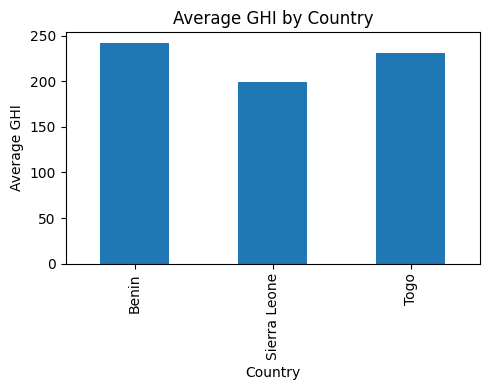

In [13]:
import matplotlib.pyplot as plt

ghi_avg = df.groupby("Country")["GHI"].mean()

plt.figure(figsize=(5,4))
ghi_avg.plot(kind="bar")

plt.title("Average GHI by Country")
plt.ylabel("Average GHI")
plt.xlabel("Country")
plt.tight_layout()
plt.show() 